In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Times New Roman',] # windows->Heiti TC
plt.rcParams['axes.unicode_minus'] = False # windows->simhei
plt.rcParams['figure.dpi'] = 200

import geopandas as gpd
import shapely
from shapely.geometry import Point,Polygon,LineString,MultiLineString,MultiPoint,MultiPolygon

import pickle
from tqdm import tqdm
from glob import glob
import joblib

# import northAndScale
import seaborn as sns

In [2]:
import os

import platform
if platform.system() == "Windows":
    os.chdir(r'H:\BaiduSyncdisk\DR.MENG-Full\Y2024-002-DT-NANJING-ACCESSIBILITY-MAUP')
else:
    os.chdir(r'/Volumes/SANDISK/DR.MENG')

In [3]:
data = joblib.load('./data_diff/plot_dist_new.joblib') # 

In [4]:
len(data)

64

# plot

In [5]:
# data[0]

In [6]:
sample_name = data[0]['name']
sample_name

'od_walk_grid250_od_900'

In [7]:
# original, remove_outliers

In [8]:
trans_type = 'walk'
time_threshold = 900

samples = [{'name': i['name'], 'value': i['remove_outliers']} for i in data if\
            trans_type in i['name'] and str(time_threshold) in i['name']]

In [9]:
len(samples)

8

In [10]:
len(samples[0]['value'].query("diff_building_grid > 0"))

8878

In [11]:
len(samples[0]['value'].query("diff_building_grid < 0"))

8170

In [12]:
samples[0]['value'].describe()['diff_building_grid']

count    62713.000000
mean         0.009464
std          0.548414
min         -2.871501
25%          0.000000
50%          0.000000
75%          0.000000
max          3.080229
Name: diff_building_grid, dtype: float64

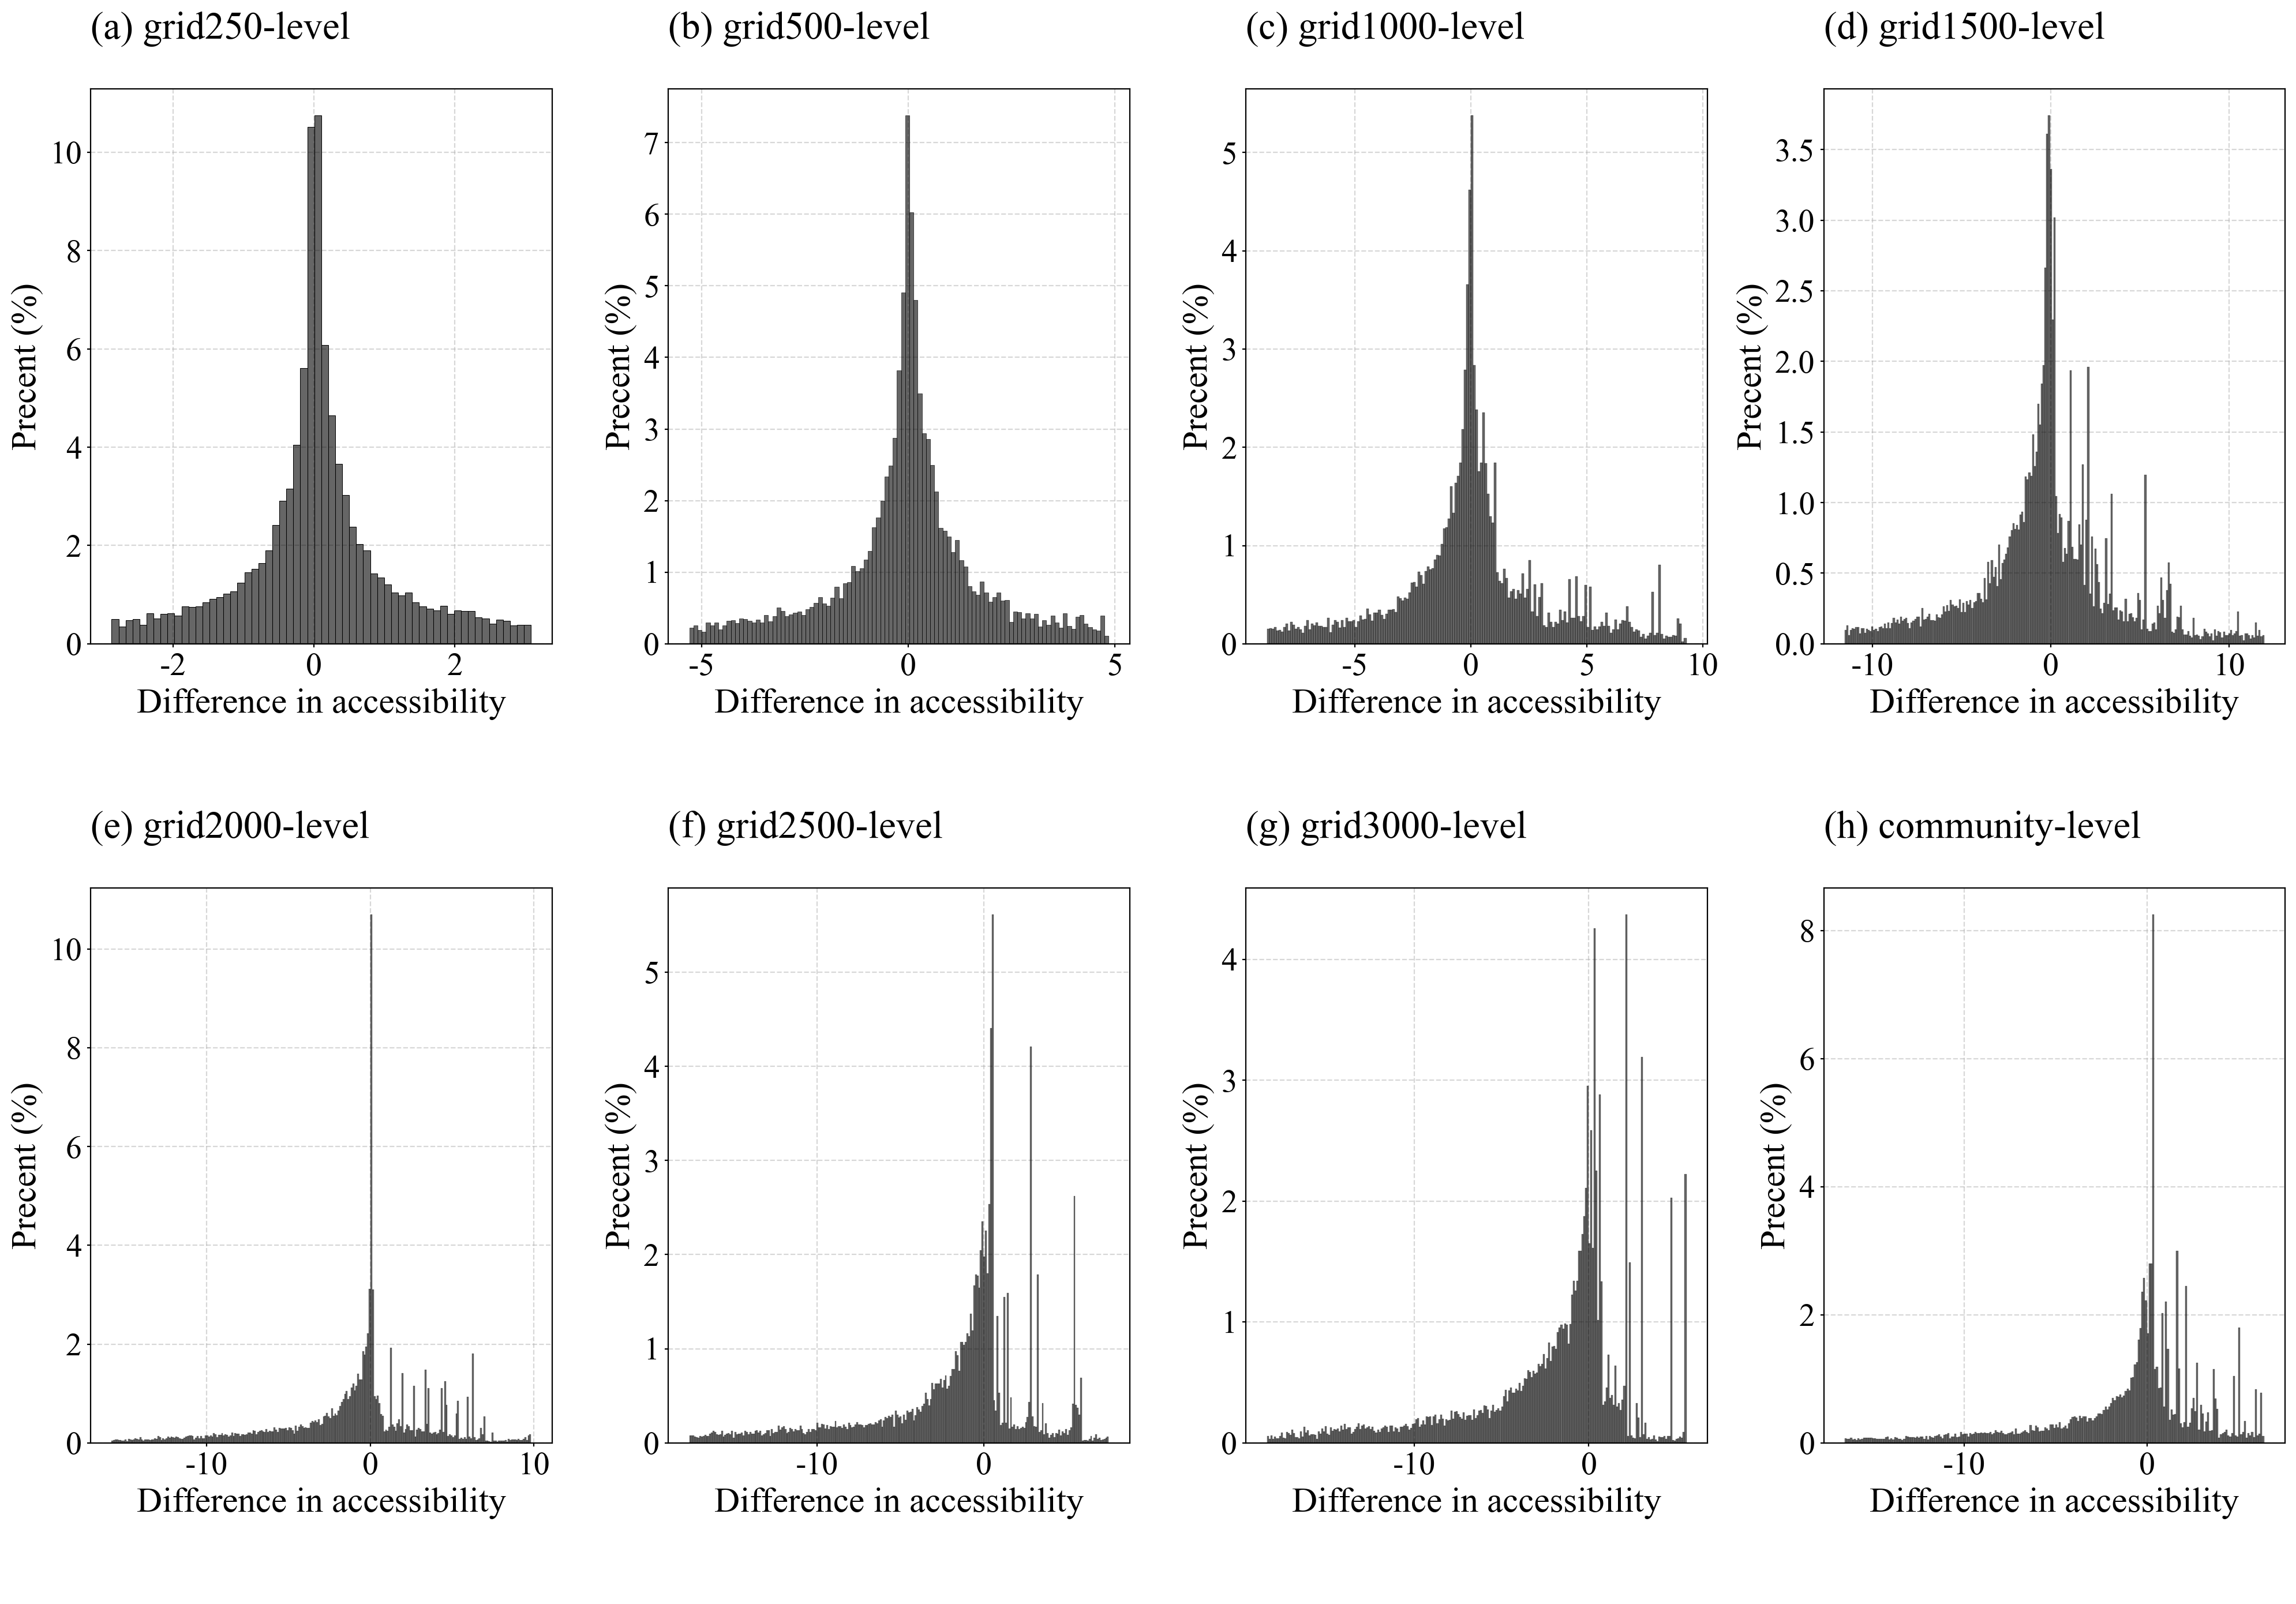

In [13]:
fig, ax = plt.subplots(2,4, figsize=(20,14))
ax = ax.flatten()

grid_names = [
        'grid250-level',
        'grid500-level',
        'grid1000-level',
        'grid1500-level',
        'grid2000-level',
        'grid2500-level',
        'grid3000-level',
        'community-level',
    ]

title_ids = list('abcdefgh')
for i, sample in enumerate(samples):
    name = sample['name']
    val = sample['value']
    val_dt = val['diff_building_grid'].values
    res_hist = val_dt
    res_hist = val_dt[val_dt != 0]

    sns.histplot(res_hist,binwidth=0.1,ax=ax[i],kde=False,stat='percent',
                 zorder=10,  label=grid_names[i], color='k', alpha=0.6)

    ax[i].tick_params(axis='both', which='major', length=2, color='k',labelsize=20)
    ax[i].grid(alpha=0.5, ls='--')

    ax[i].set_xlabel(f'Difference in accessibility\n\n',fontsize=22)
    ax[i].set_ylabel('Precent (%)',fontsize=22)
    
    ax[i].set_title(f'({title_ids[i]}) {grid_names[i]}\n', fontsize=24, loc='left')
    
    # ax[i].legend(loc='upper left')

plt.tight_layout()
# plt.savefig(f'./result/png/diff_dist/{trans_type}_{time_threshold}.png', dpi=300, bbox_inches='tight')

In [14]:
"""
./Py/N03-histplot to process all data.
"""

'\n./Py/N03-histplot to process all data.\n'